In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [100]:
data=pd.read_csv('/content/50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [102]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [103]:
data.corr()

<ipython-input-103-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


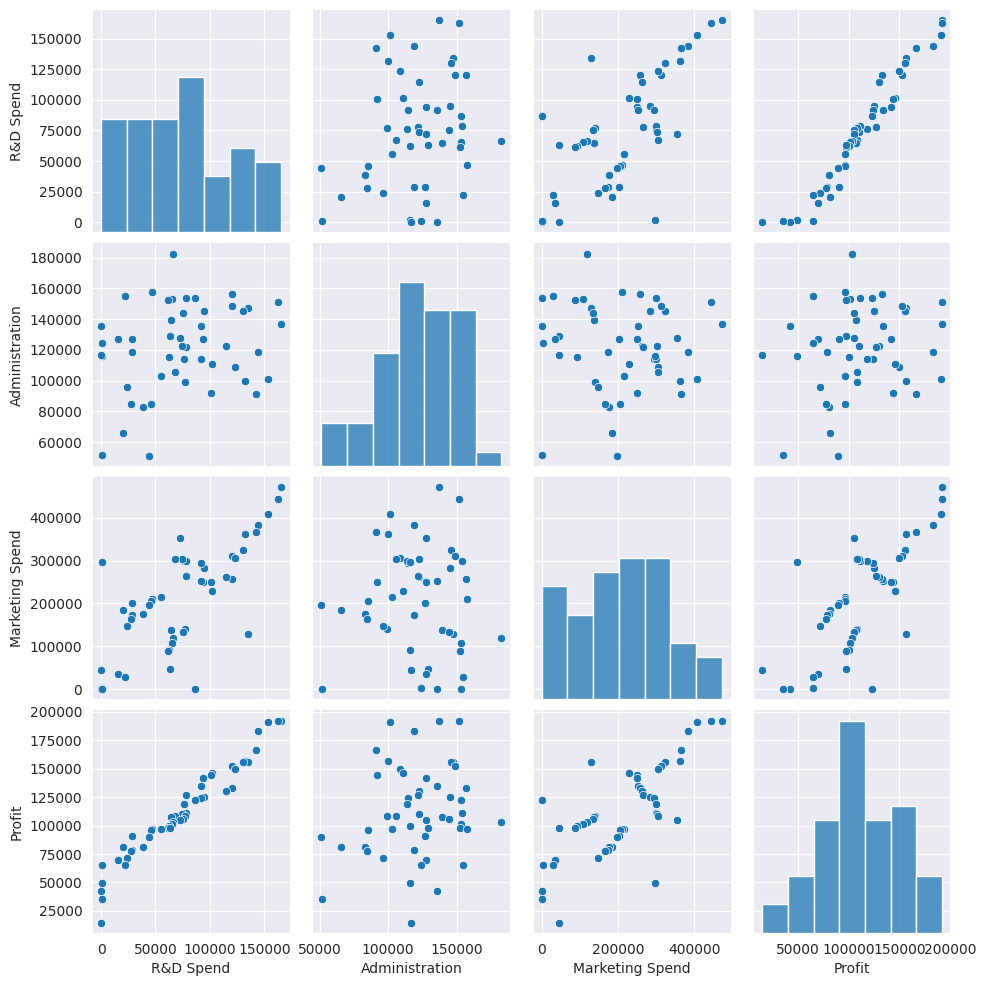

In [104]:
sns.set_style(style='darkgrid')
sns.pairplot(data)


In [105]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MS'},axis=1)

In [106]:
data1

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [107]:
model=smf.ols('Profit~RDS+MS+ADM',data=data1).fit()

In [108]:
model.rsquared,model.rsquared_adj


(0.9507459940683246, 0.9475337762901719)

In [109]:
model.params

Intercept    50122.192990
RDS              0.805715
MS               0.027228
ADM             -0.026816
dtype: float64

In [110]:
print(model.tvalues,np.round(model.pvalues,5))

Intercept     7.626218
RDS          17.846374
MS            1.655077
ADM          -0.525507
dtype: float64 Intercept    0.00000
RDS          0.00000
MS           0.10472
ADM          0.60176
dtype: float64


In [111]:
model1=smf.ols('Profit~MS',data=data1).fit()

In [112]:
print(model1.tvalues,np.round(model1.pvalues,5))

Intercept    7.808356
MS           7.802657
dtype: float64 Intercept    0.0
MS           0.0
dtype: float64


In [113]:
model2=smf.ols('Profit~ADM',data=data1).fit()

In [114]:
print(model2.tvalues,np.round(model2.pvalues,5))

Intercept    3.040044
ADM          1.419493
dtype: float64 Intercept    0.00382
ADM          0.16222
dtype: float64


In [115]:
model3=smf.ols('Profit~ADM+MS',data=data1).fit()

In [116]:
print(model3.tvalues,np.round(model3.pvalues,5))

Intercept    1.142741
ADM          2.467779
MS           8.281039
dtype: float64 Intercept    0.25893
ADM          0.01729
MS           0.00000
dtype: float64


In [117]:
# calculating vif
rsq_r=smf.ols('RDS~ADM+MS',data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols('ADM~RDS+MS',data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols('MS~RDS+ADM',data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

In [118]:
d1={'Variables':['RDS','ADM','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADM,1.175091
2,MS,2.326773


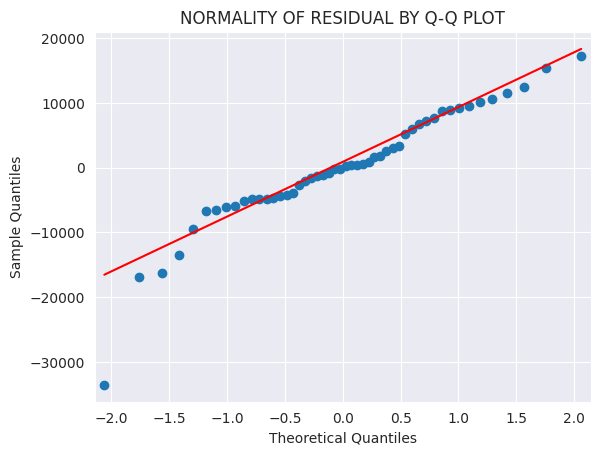

In [119]:
#RESIDUAL ANALYSIS
#TEST FOR NORMALITY OF RESIDUAL BY Q-Q PLOT
qqplot=sm.qqplot(model.resid,line='q')
plt.title('NORMALITY OF RESIDUAL BY Q-Q PLOT')
plt.show()

In [120]:
list(np.where(model.resid<-30000))

[array([49])]

In [121]:
#test for homoscedasticity
def get_standardized_values(vals):
  return(vals-vals.mean())/vals.std()   

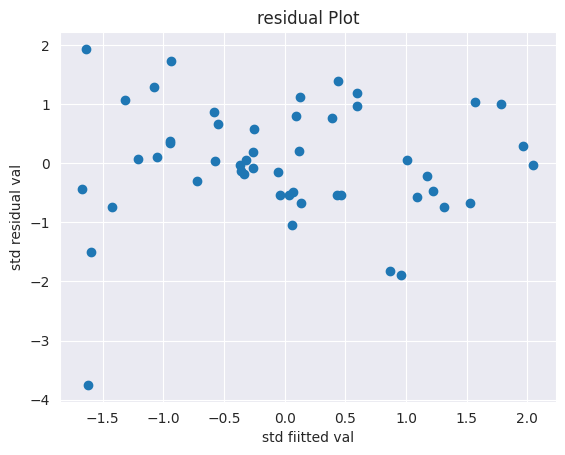

In [122]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('residual Plot')
plt.xlabel('std fiitted val')
plt.ylabel('std residual val')
plt.show()

eval_env: 1


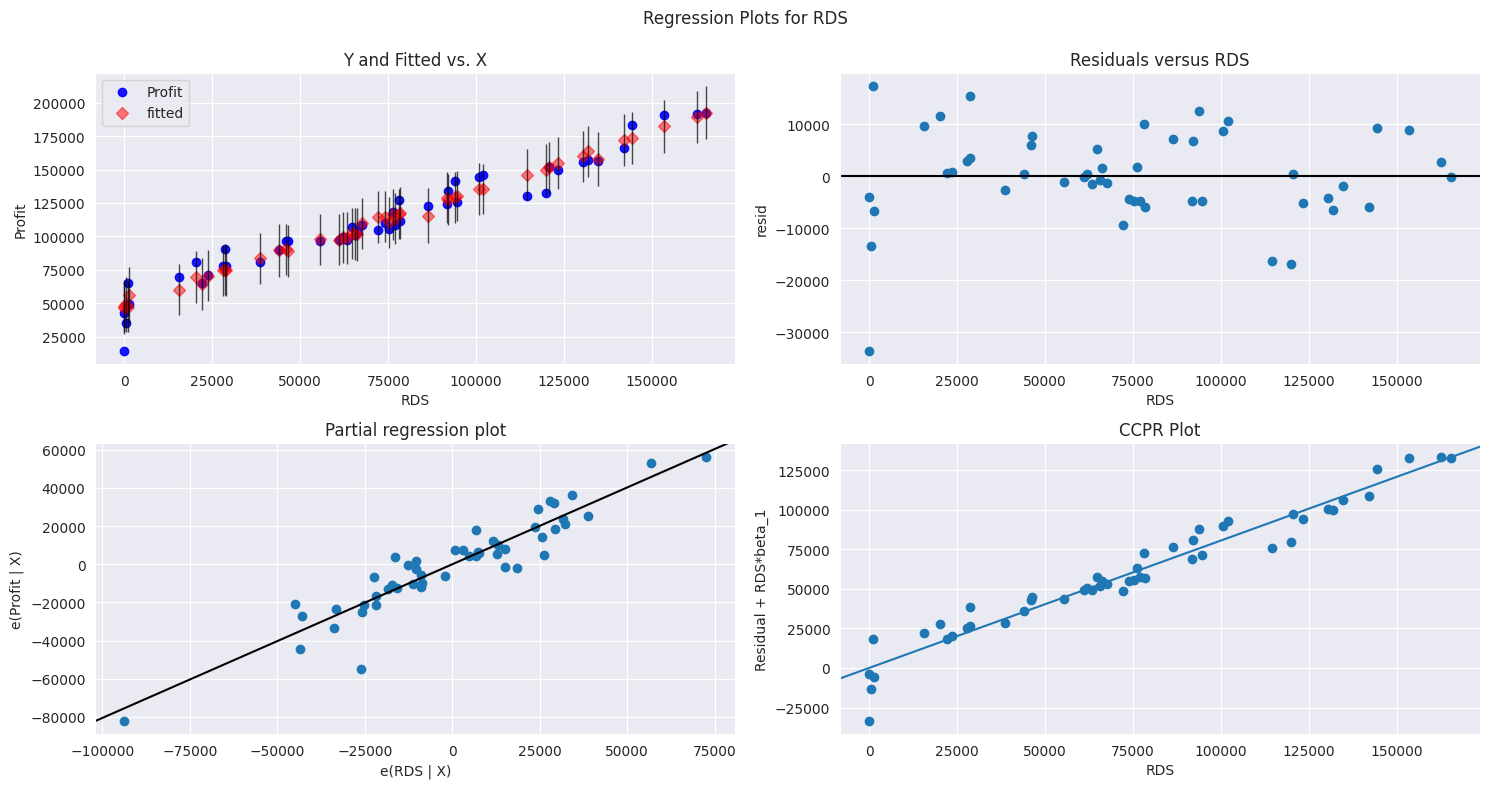

In [123]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


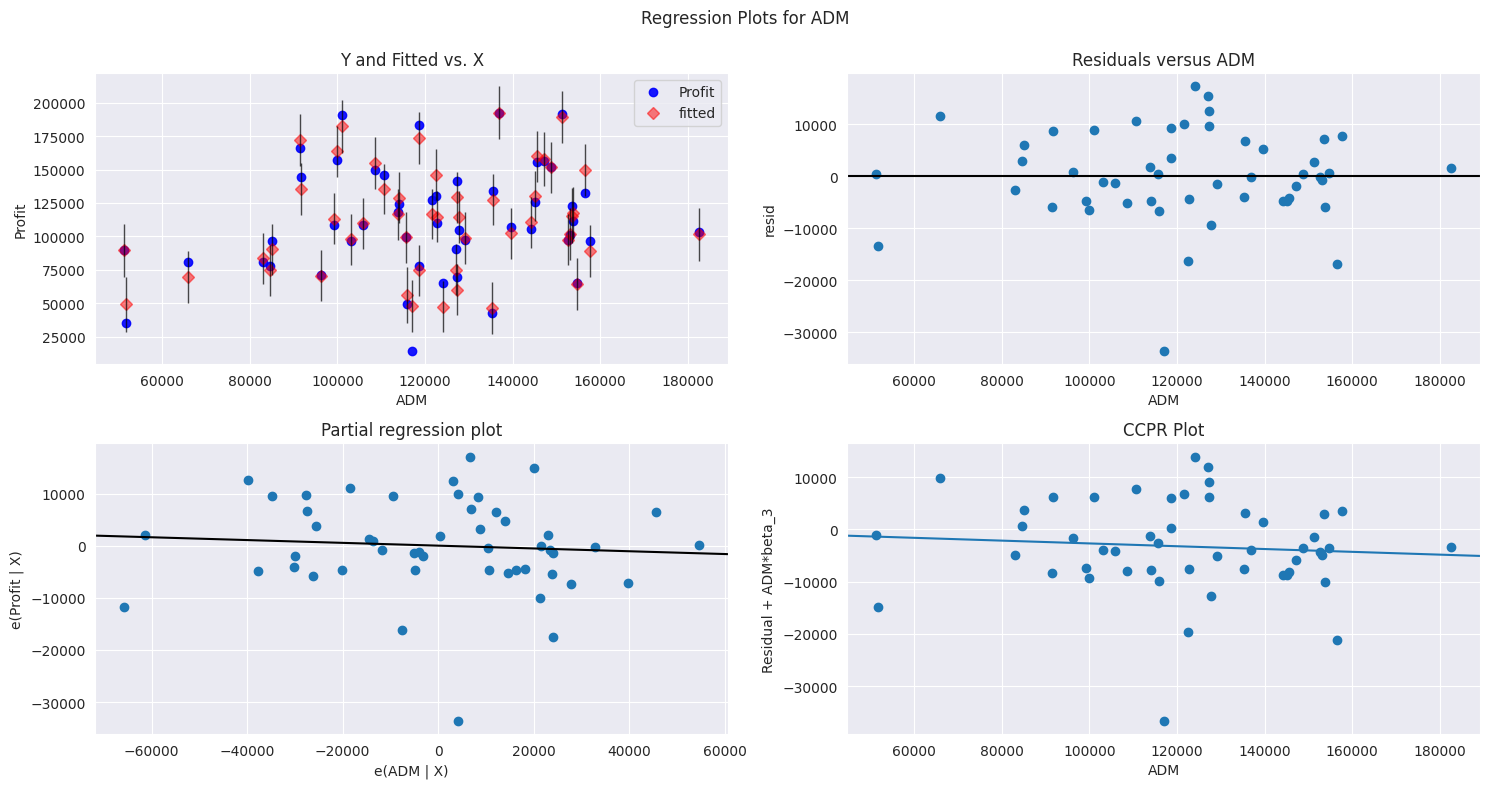

In [124]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'ADM',fig=fig)
plt.show()

eval_env: 1


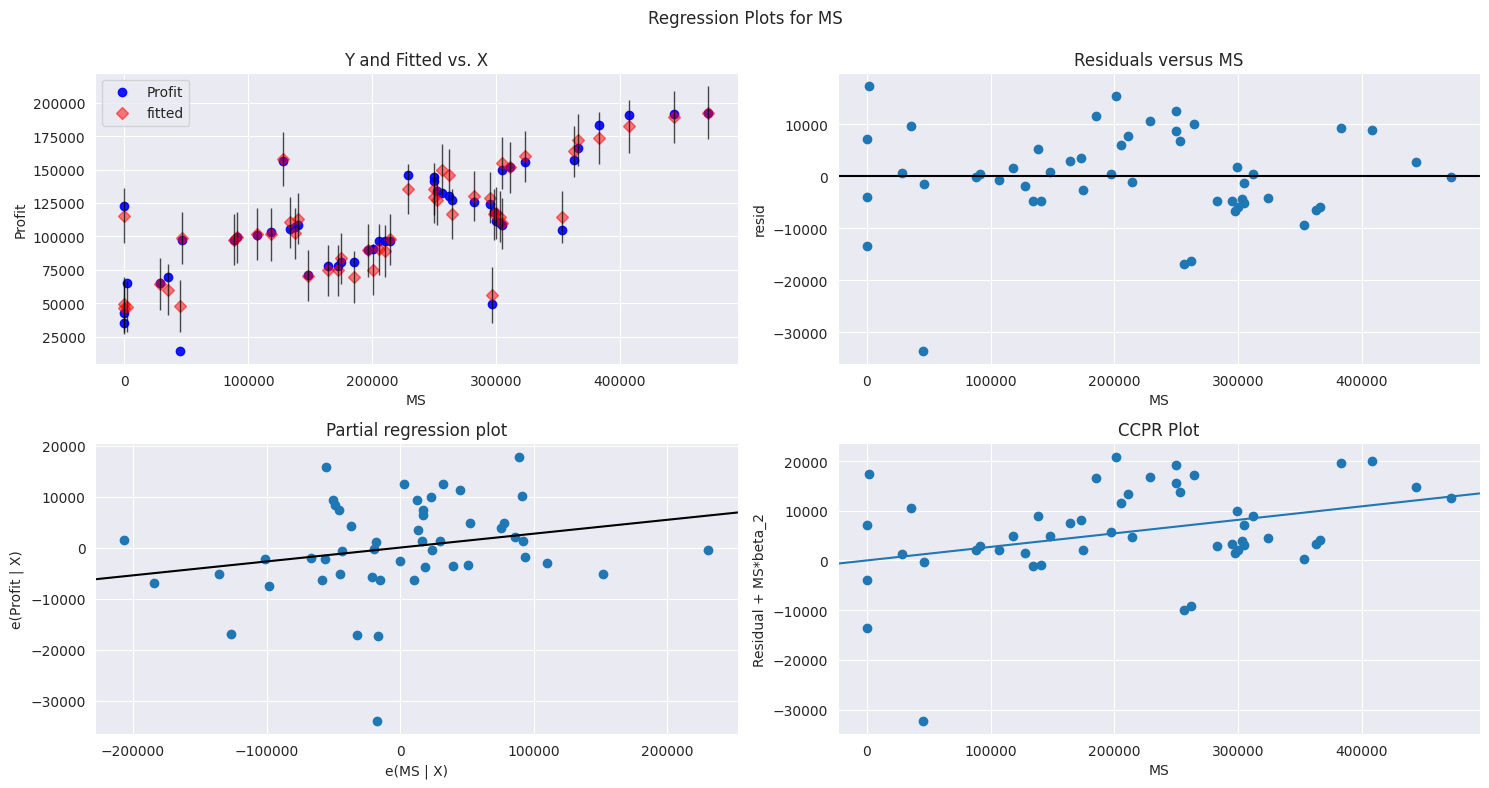

In [125]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

In [126]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

Text(0, 0.5, 'COOK DIST')

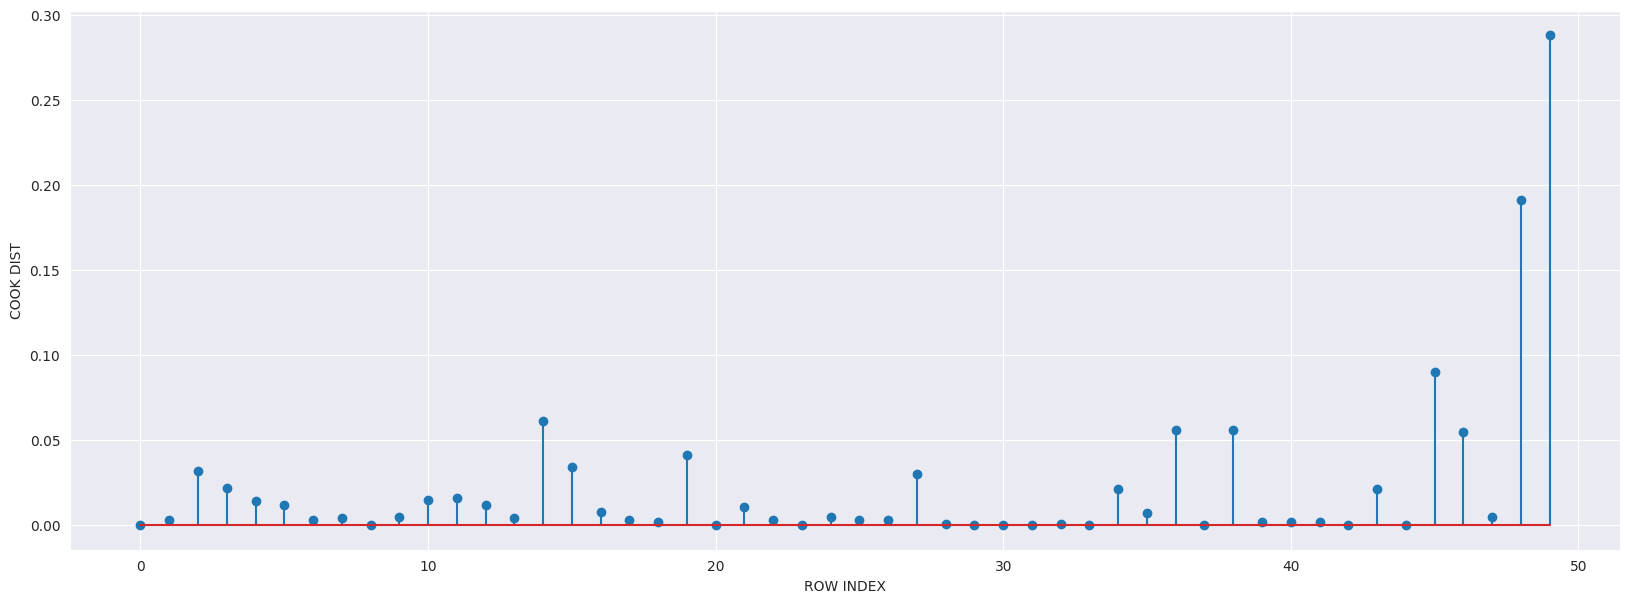

In [127]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('ROW INDEX')
plt.ylabel('COOK DIST')

In [128]:
np.argmax(c),np.max(c)

(49, 0.288082292754327)

In [129]:
data2=data1.drop(data1.index[[49]])
data2

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [130]:
data3=data2.reset_index()

data3

,index,RDS,ADM,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [131]:
data4=data3.drop(['index'],axis=1)
data4


,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [132]:
final=smf.ols('Profit~RDS+ADM+MS',data=data4).fit()

In [133]:
(c_v,_)=final.get_influence().cooks_distance
c_v


array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

Text(0, 0.5, 'COOK DIST')

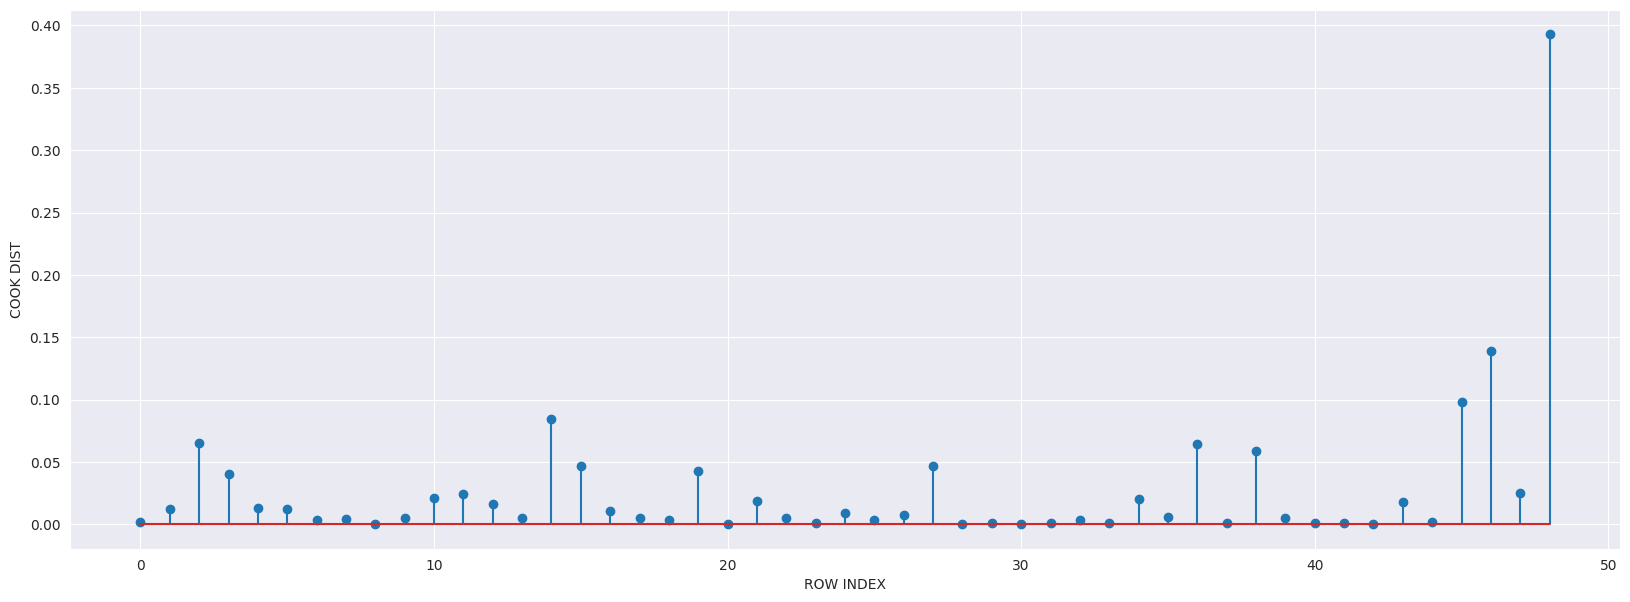

In [134]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(c_v,3))
plt.xlabel('ROW INDEX')
plt.ylabel('COOK DIST')

In [135]:
np.argmax(c_v),np.max(c_v)

(48, 0.39274420556321443)

In [136]:
data5=data4.drop(data4.index[[48]])
data5

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [137]:
final1=smf.ols('Profit~RDS+ADM+MS',data=data5).fit()

In [138]:
(final1.rsquared,final1.aic)

(0.9626766170294073, 994.6690439260116)

In [139]:
final1.rsquared

0.9626766170294073

In [140]:
#new data pred
new_data=pd.DataFrame({'RDS':80000,'ADM':95000,'MS':150000},index=[48])
new_data

,RDS,ADM,MS
48,80000,95000,150000


In [141]:
final1.predict(new_data)

48    118774.184129
dtype: float64

In [142]:
pred_y=final.predict(data5)
pred_y


0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
dtype: float64

In [143]:
d2={'prep_model':['model','final_model'],'rsquared':[model.rsquared,final1.rsquared]}
tab=pd.DataFrame(d2)
tab

,prep_model,rsquared
0,model,0.950746
1,final_model,0.962677


Q2.TOYOTA

In [211]:
import numpy as np
import pandas as pd 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [145]:
cars=pd.read_csv('/content/ToyotaCorolla.csv',encoding='latin')
cars

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [146]:
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [147]:
for col in cars.columns:
    print(col)

Id
Model
Price
Age_08_04
Mfg_Month
Mfg_Year
KM
Fuel_Type
HP
Met_Color
Color
Automatic
cc
Doors
Cylinders
Gears
Quarterly_Tax
Weight
Mfr_Guarantee
BOVAG_Guarantee
Guarantee_Period
ABS
Airbag_1
Airbag_2
Airco
Automatic_airco
Boardcomputer
CD_Player
Central_Lock
Powered_Windows
Power_Steering
Radio
Mistlamps
Sport_Model
Backseat_Divider
Metallic_Rim
Radio_cassette
Tow_Bar


In [148]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [149]:
cars.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
#("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

cars1=cars.iloc[:,[2,3,6,8,12,13,15,16,17]]
cars1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [151]:
cars2=cars1.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)
cars2

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [152]:
cars2[cars2.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [153]:
cars3=cars2.drop_duplicates().reset_index(drop=True)

cars3



,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [154]:
cars3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   cc      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   QT      1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [155]:
cars3.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [156]:
cars3.isna().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [157]:
cars3.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


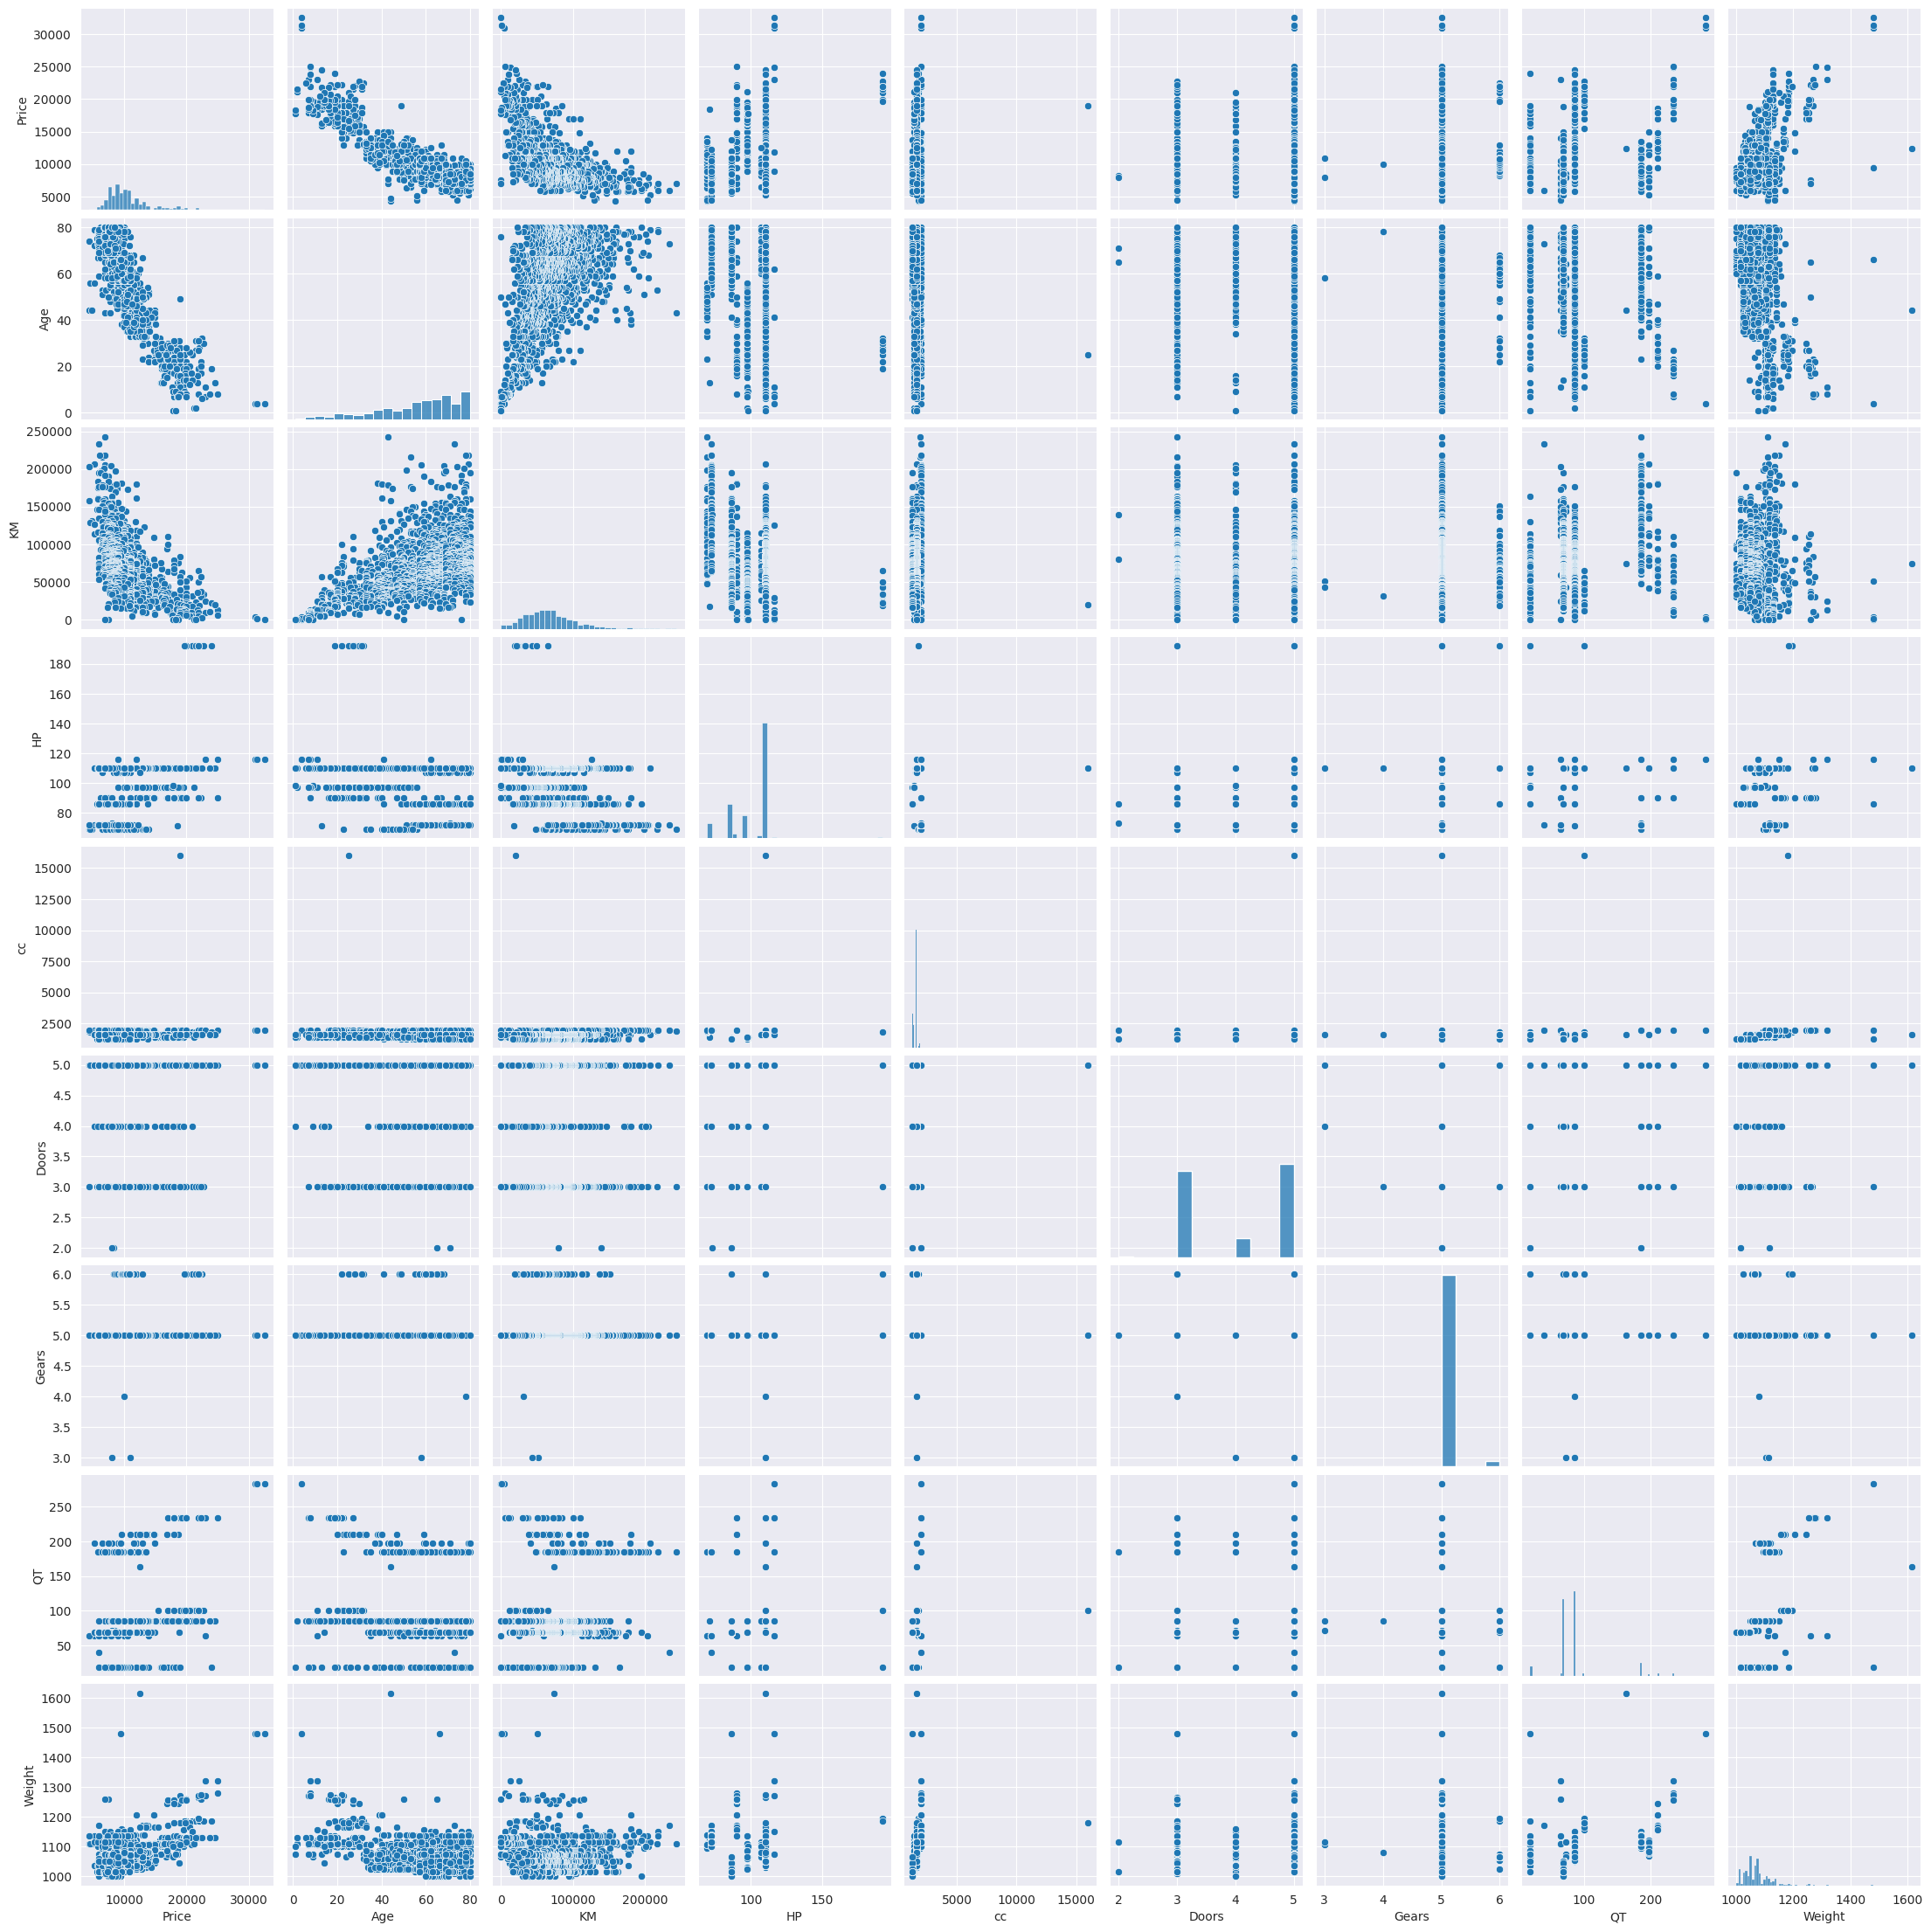

In [158]:
sns.set_style(style='darkgrid')
sns.pairplot(cars3)

In [159]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=cars3).fit()

In [160]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [161]:
model.tvalues,np.round(model.pvalues,6)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 cc           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.000111
 Age          0.000000
 KM           0.000000
 HP           0.000000
 cc           0.188239
 Doors        0.981644
 Gears        0.002452
 QT           0.003290
 Weight       0.000000
 dtype: float64)

In [162]:

model.rsquared,model.rsquared_adj #acc=86.17%

(0.8625200256947001, 0.8617487495415147)

In [163]:
modelcc=smf.ols('Price~cc',data=cars3).fit()

In [164]:
modelcc.tvalues,modelcc.pvalues

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [165]:
modeld=smf.ols('Price~Doors',data=cars3).fit()

In [166]:
modeld.tvalues,modeld.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [167]:
model1=smf.ols('Price~cc+Doors',data=cars3).fit()

In [168]:
model1.tvalues,model1.pvalues

(Intercept    12.786341
 cc            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 cc           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [169]:
#vif model valid
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data=cars3).fit().rsquared
vif_age=1/(1-rsq_age)
rsq_km=smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=cars3).fit().rsquared
vif_km=1/(1-rsq_km)
rsq_hp=smf.ols('HP~Age+cc+Doors+Gears+QT+Weight',data=cars3).fit().rsquared
vif_hp=1/(1-rsq_hp)
rsq_cc=smf.ols('cc~Age+HP+Doors+Gears+QT+Weight',data=cars3).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_d=smf.ols('Doors~Age+cc+HP+Gears+QT+Weight',data=cars3).fit().rsquared
vif_d=1/(1-rsq_d)
rsq_g=smf.ols('Gears~Age+cc+Doors+HP+QT+Weight',data=cars3).fit().rsquared
vif_g=1/(1-rsq_g)
rsq_qt=smf.ols('QT~Age+cc+Doors+Gears+HP+Weight',data=cars3).fit().rsquared
vif_qt=1/(1-rsq_qt)
rsq_w=smf.ols('Weight~Age+cc+Doors+Gears+QT+HP',data=cars3).fit().rsquared
vif_w=1/(1-rsq_w)

In [170]:
d1={'Variables':['Age','KM','HP','cc','Doors','Gears','QT','Weight'],'Vif':[vif_age,vif_km,vif_hp,vif_cc,vif_d,vif_g,vif_qt,vif_w]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.363168
3,cc,1.157656
4,Doors,1.154905
5,Gears,1.092743
6,QT,2.148412
7,Weight,2.483264


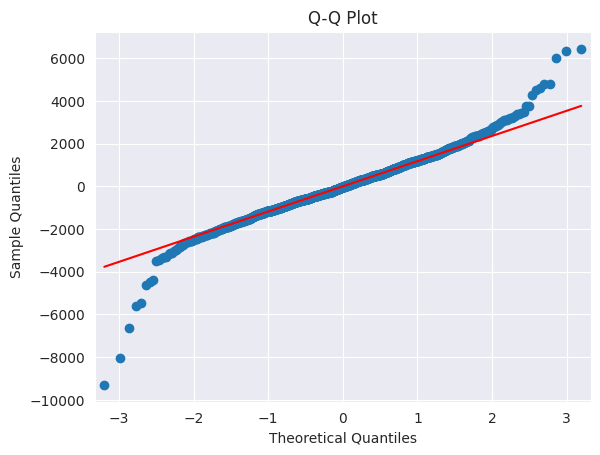

In [171]:
#residual analysis
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Q-Q Plot')
plt.show()

In [172]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [173]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

In [174]:
def get_standardized_values(vals):
  return(vals-vals.mean())/vals.std()

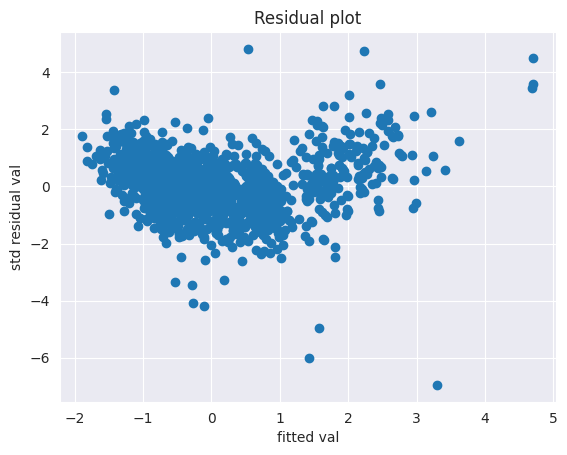

In [175]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('fitted val')
plt.ylabel('std residual val')
plt.show()

eval_env: 1


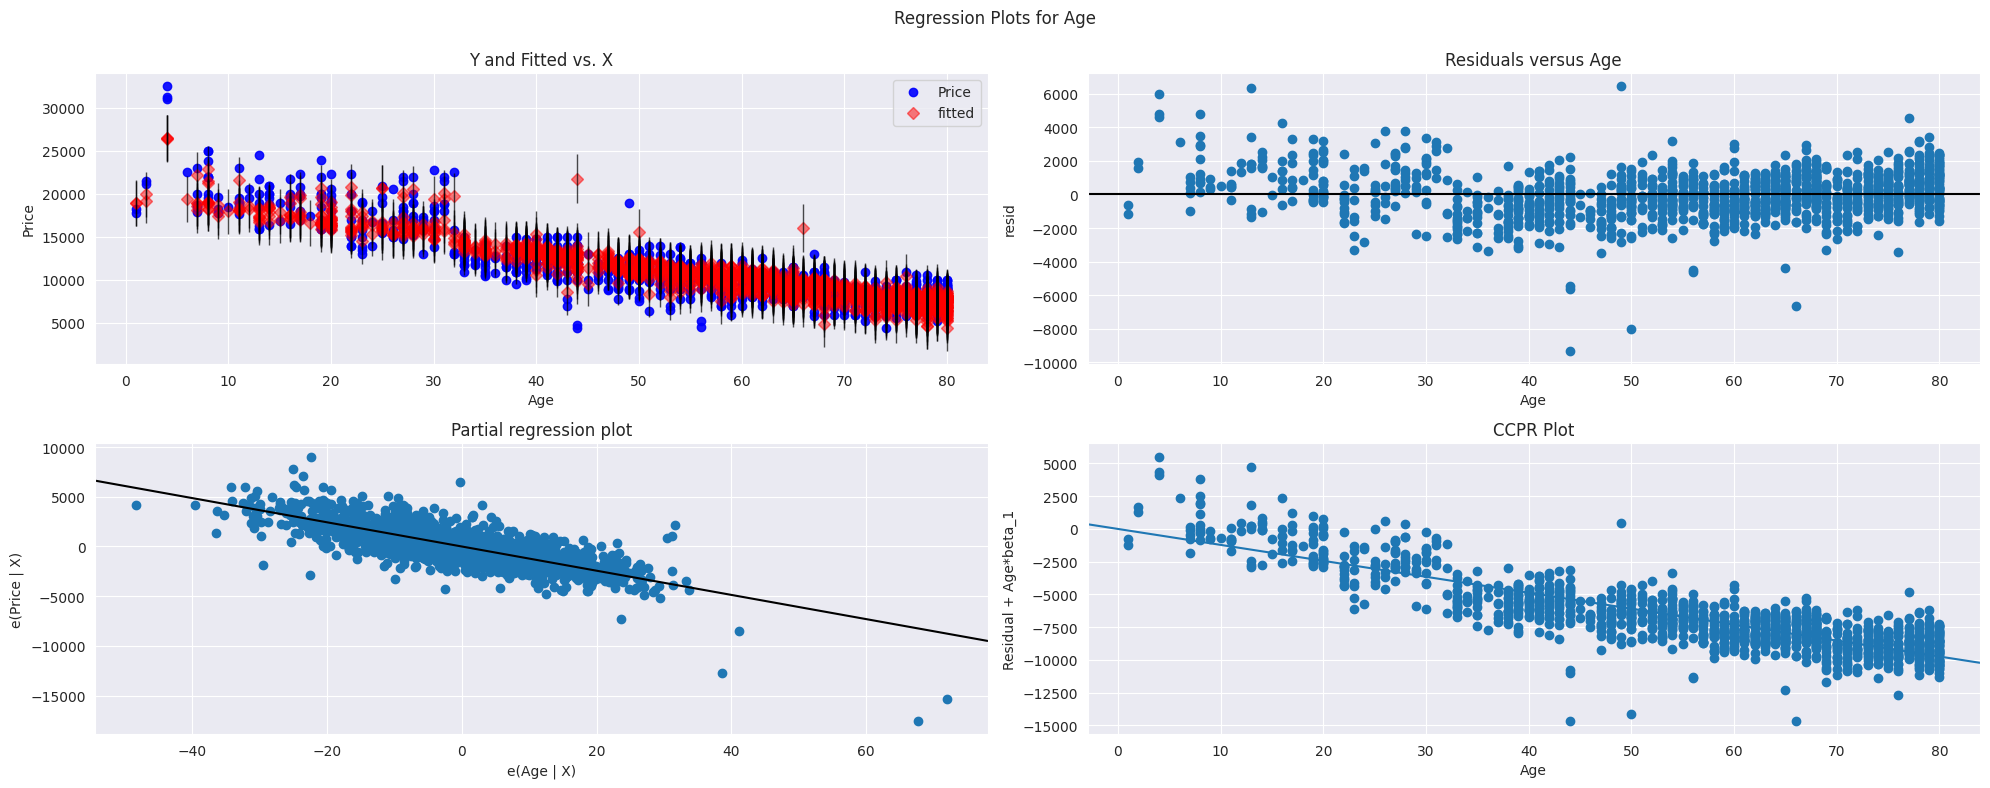

In [176]:
fig=plt.figure(figsize=(20,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


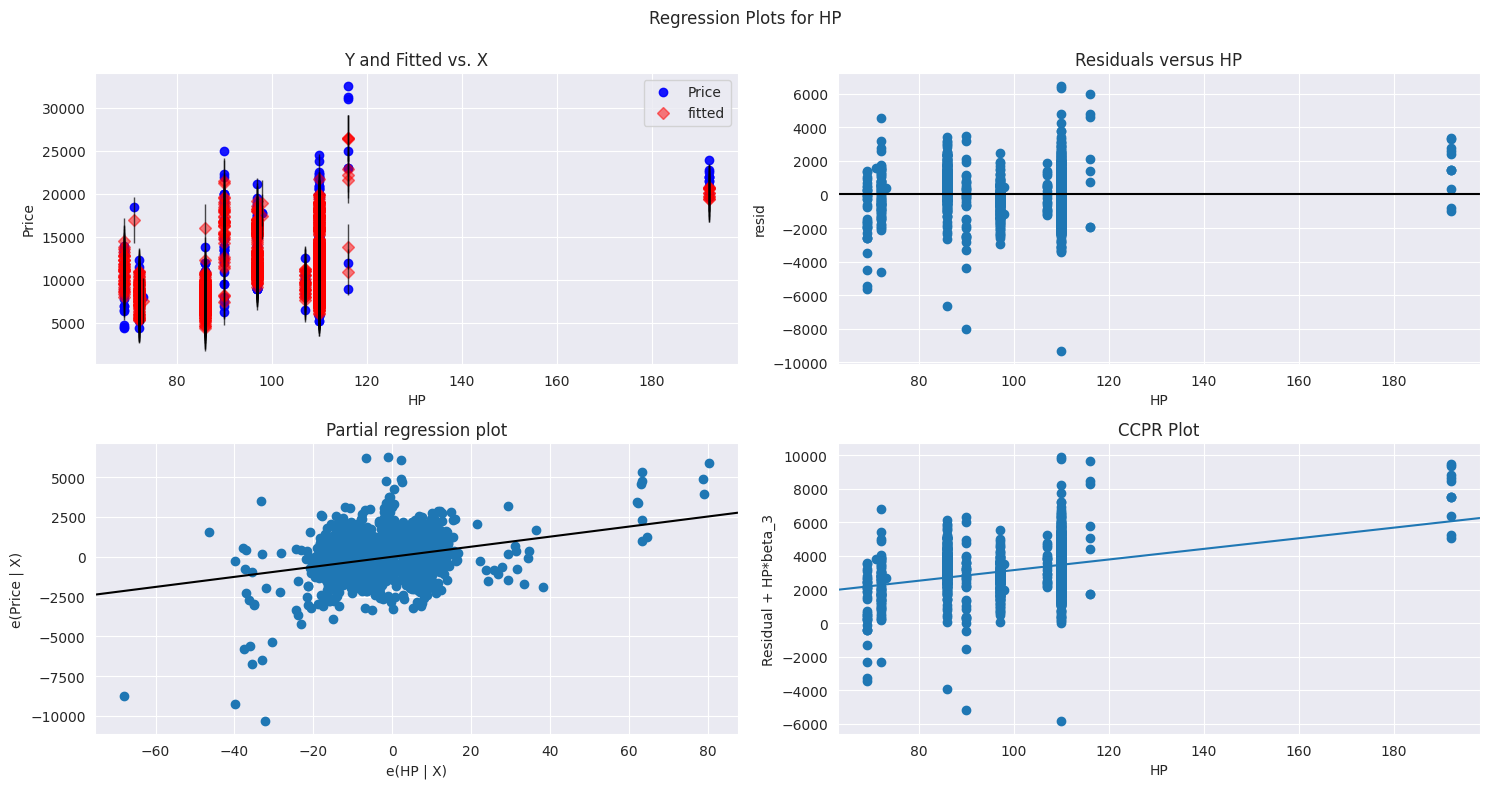

In [177]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


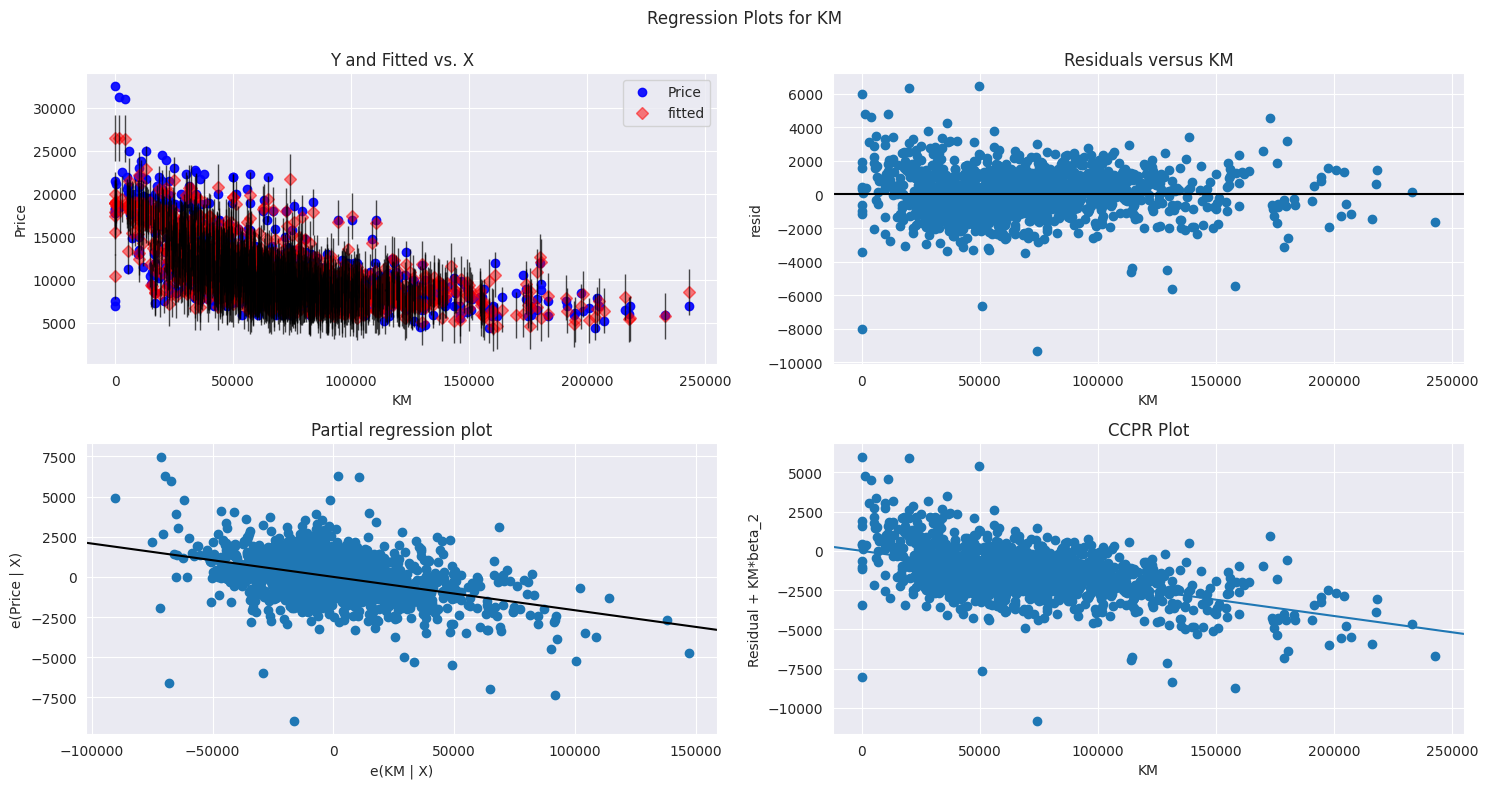

In [178]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


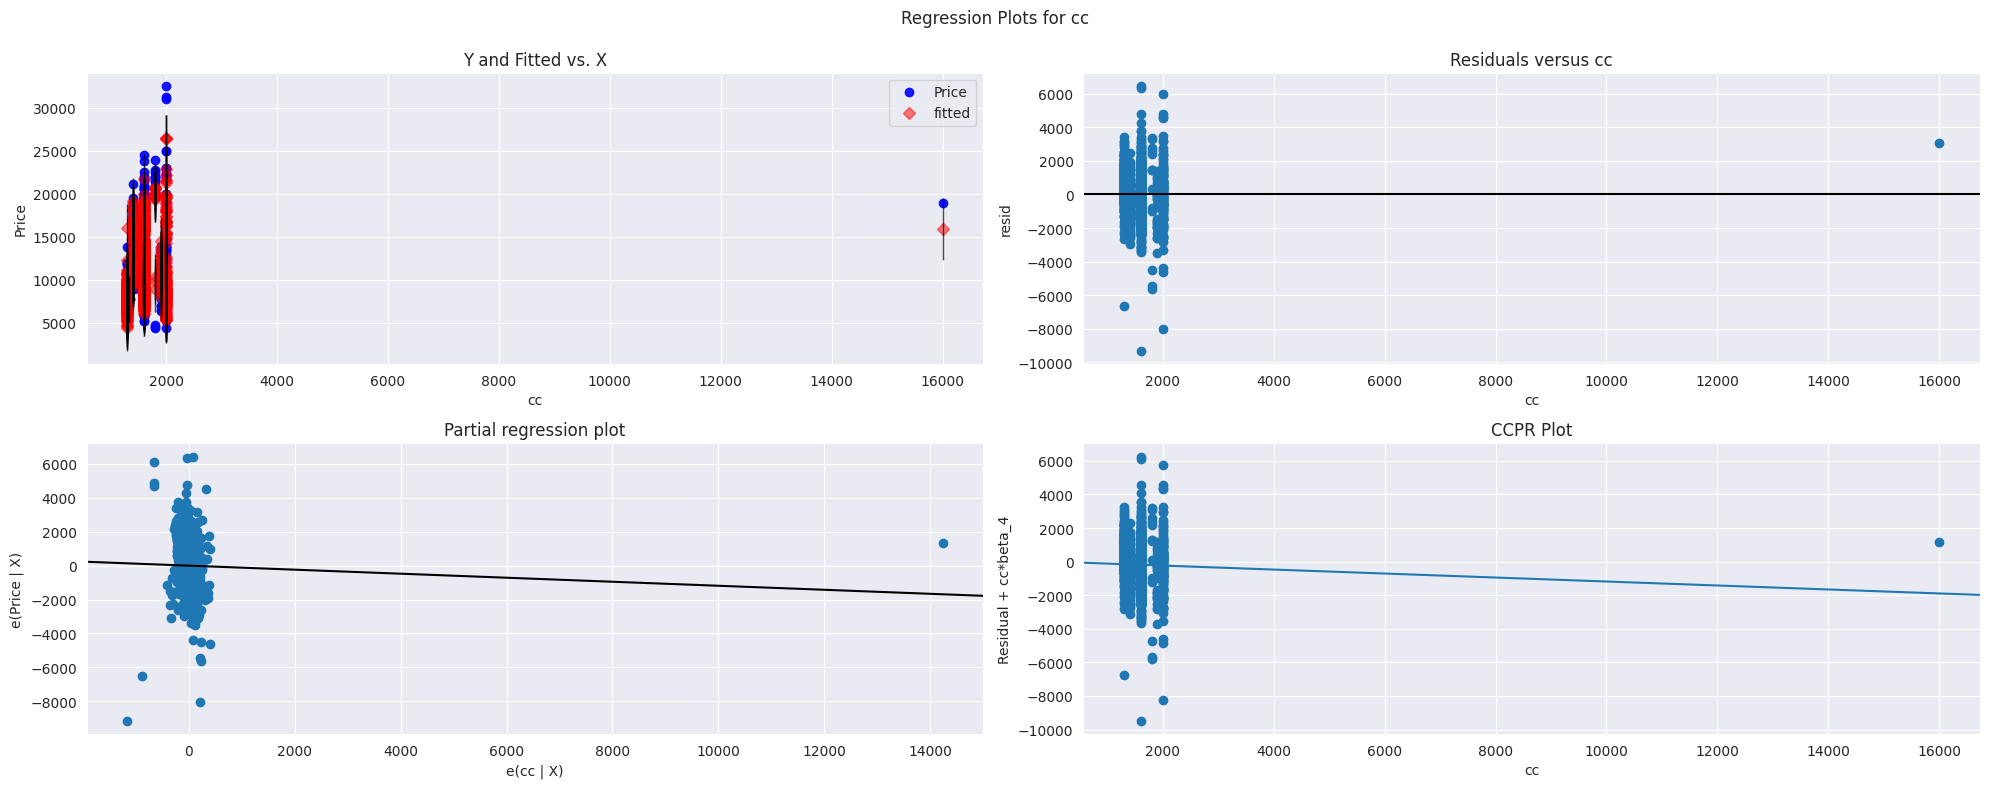

In [179]:
fig=plt.figure(figsize=(20,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


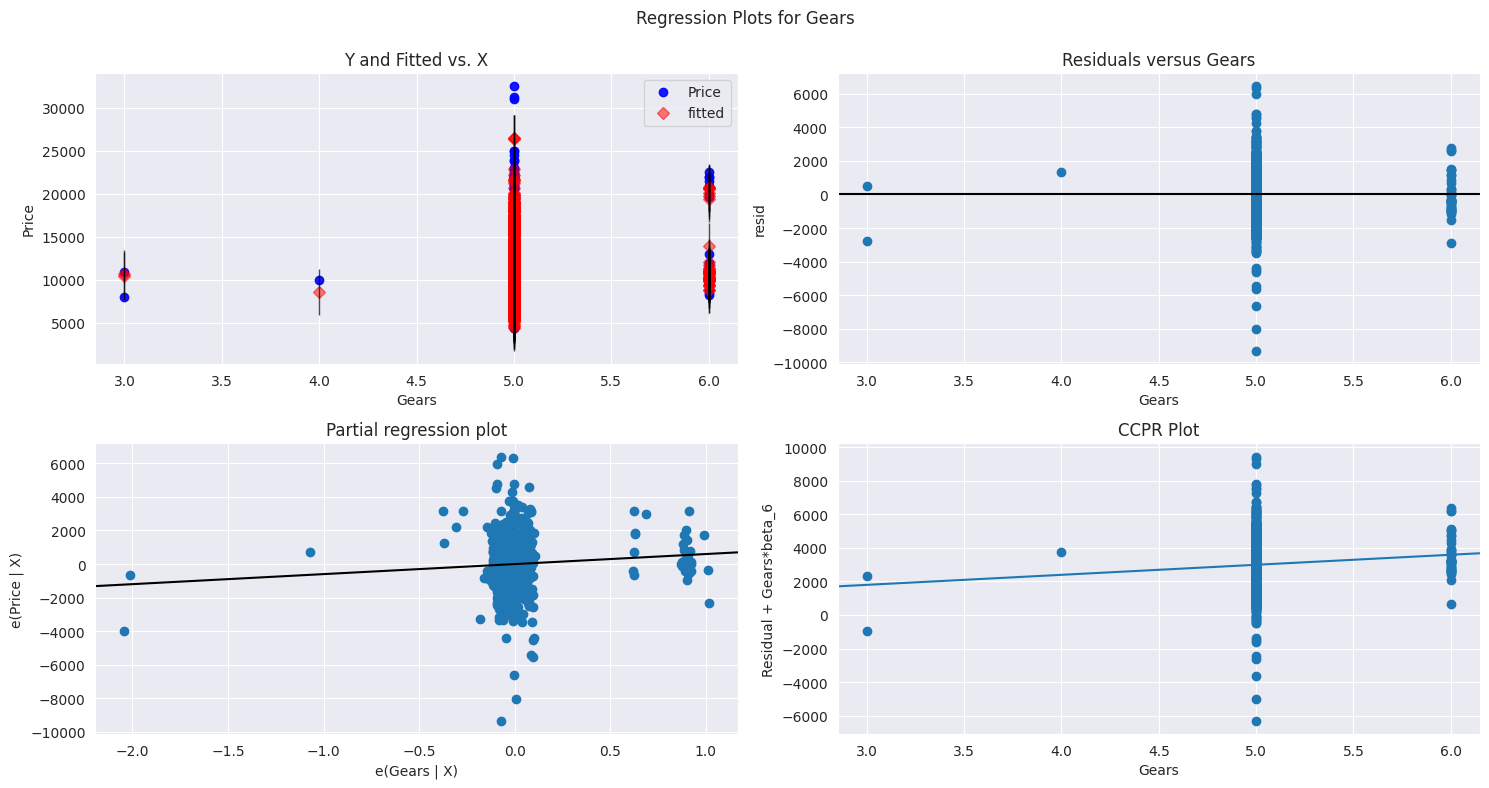

In [180]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


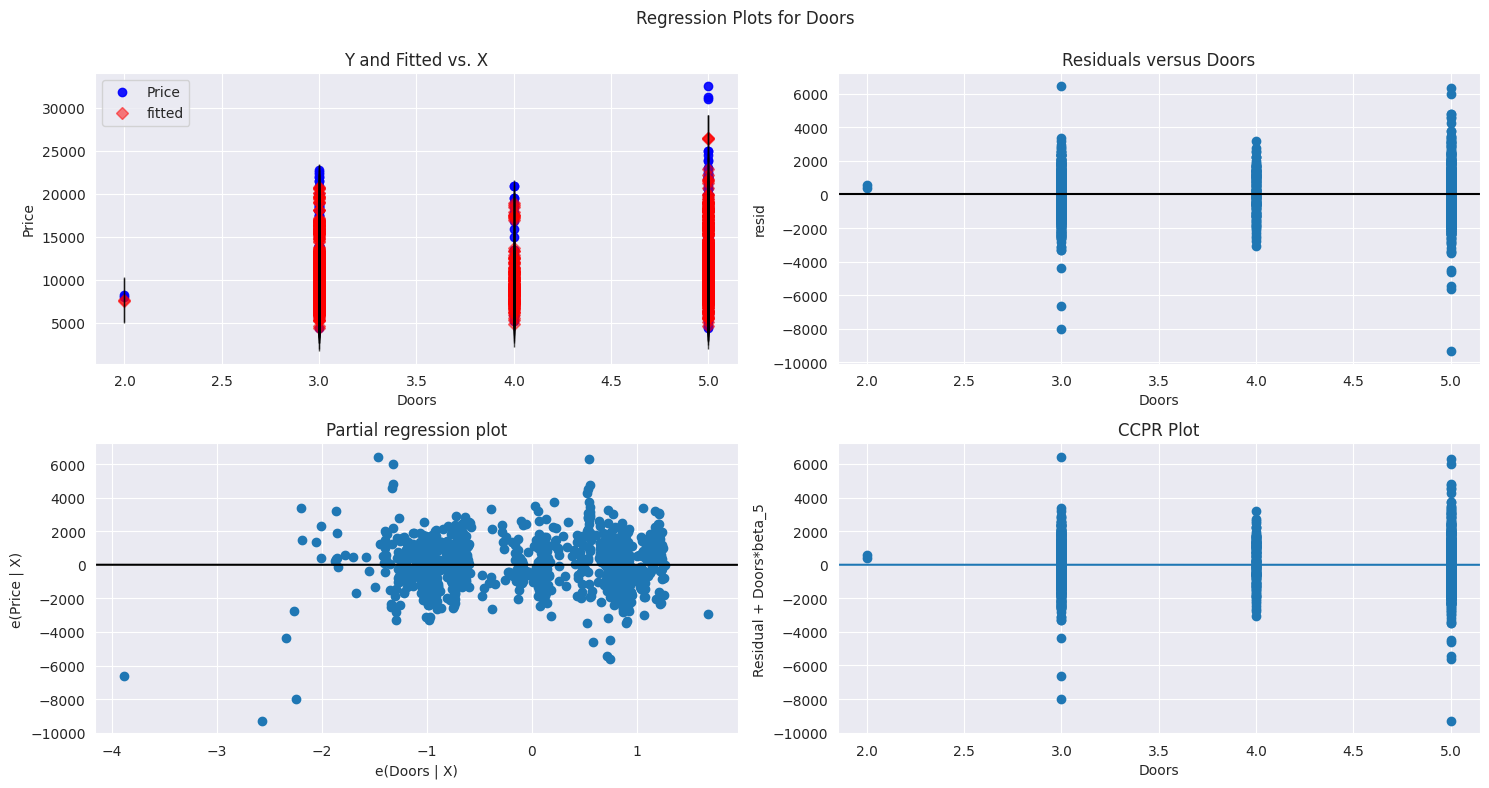

In [181]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


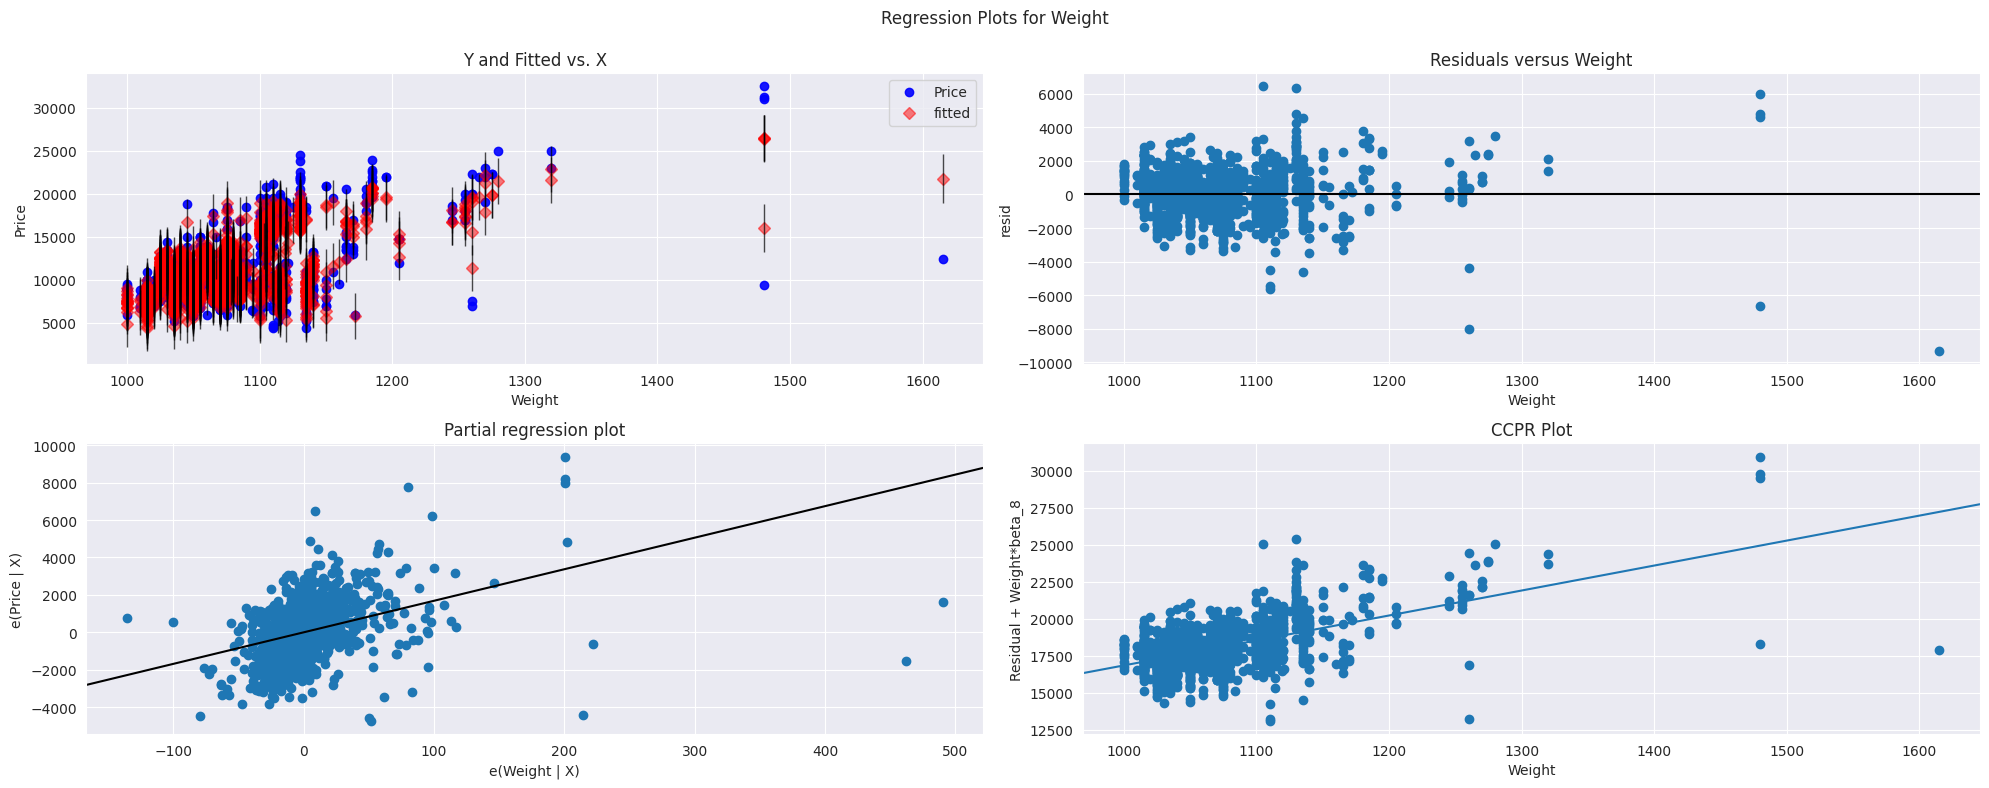

In [182]:
fig=plt.figure(figsize=(20,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

eval_env: 1


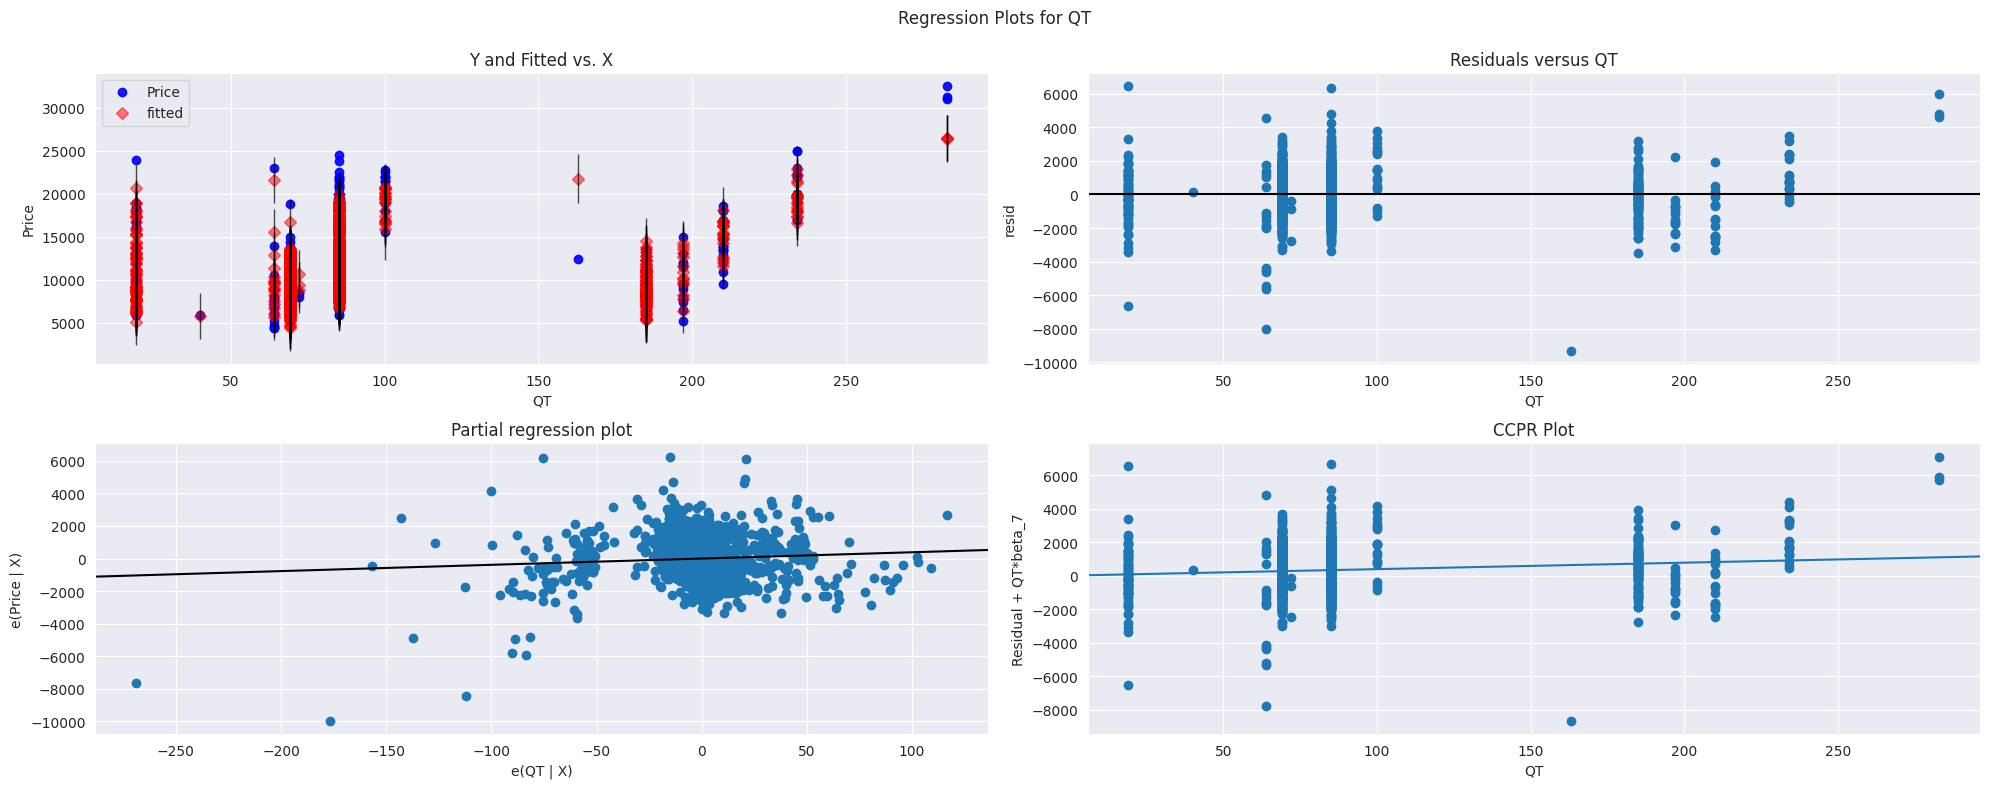

In [183]:
fig=plt.figure(figsize=(20,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

In [184]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

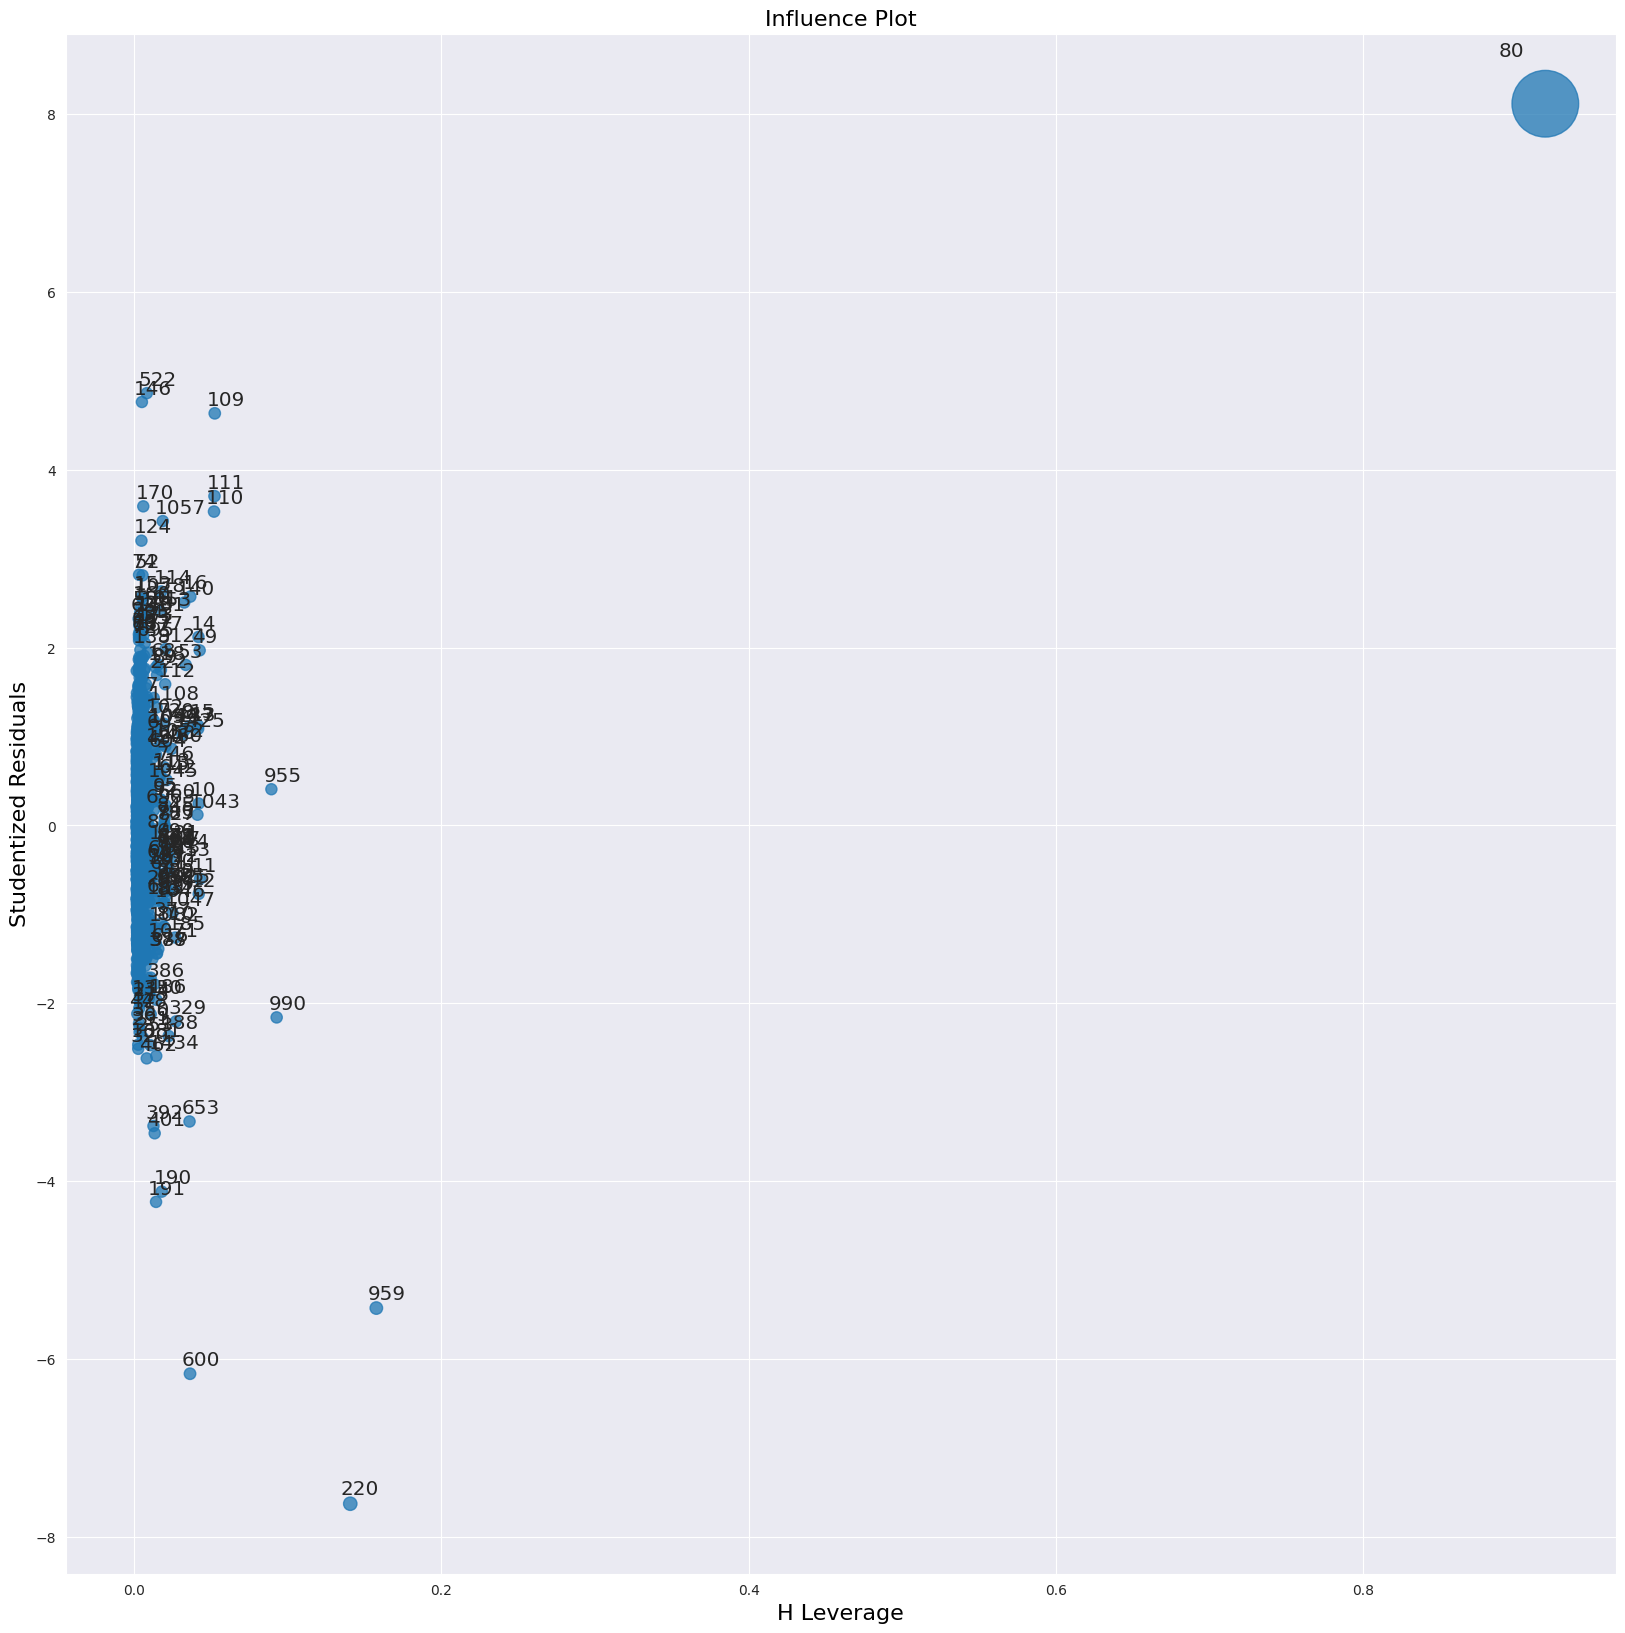

In [185]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax=ax)


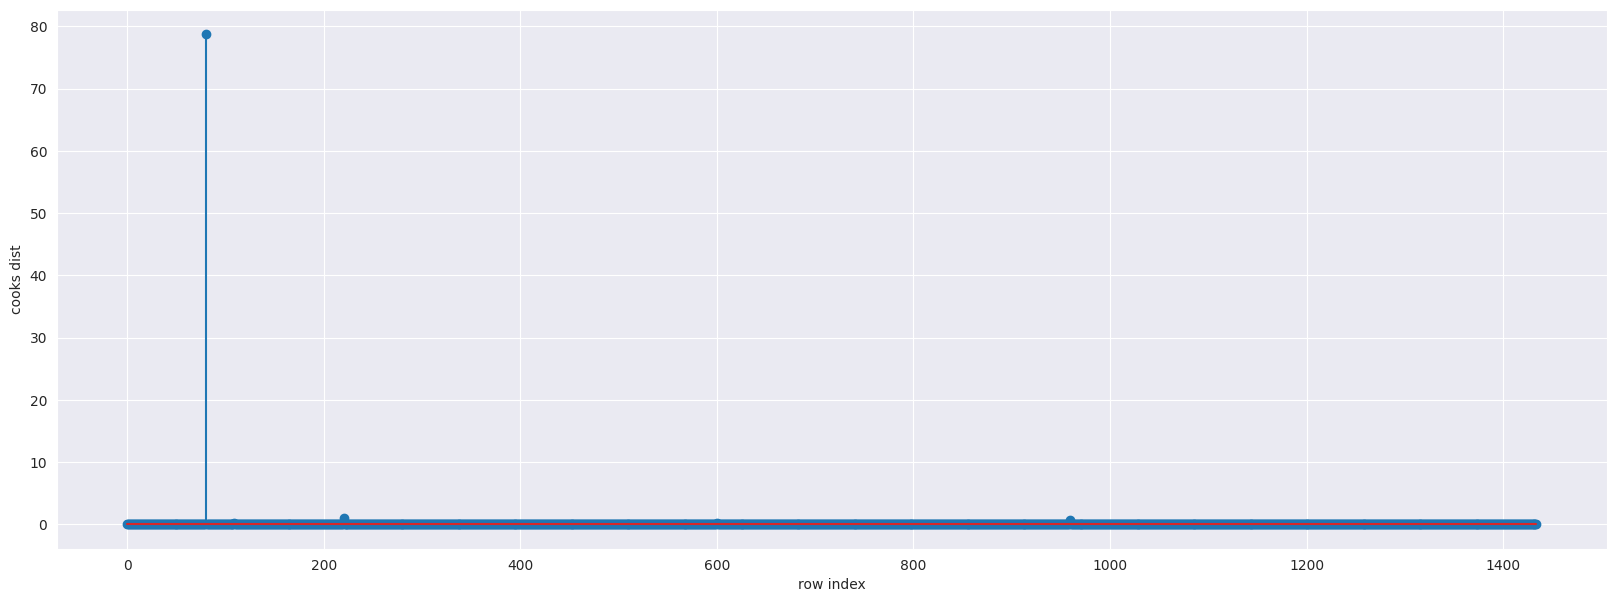

In [186]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars3)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks dist')
plt.show()

In [187]:
np.argmax(c),np.max(c)

(80, 78.72950582258932)

In [188]:
cars3[cars3.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [195]:
cars3

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [212]:
cars4=cars3.drop(cars3.index[[80]],axis=0).reset_index(drop=True)
cars4

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [213]:
trial=smf.ols('Price~Age+KM+HP+QT+Weight+cc+Doors+Gears',data=cars4).fit()

In [220]:
(c_v)=trial.get_influence().cooks_distance
c_v

(array([6.74590070e-03, 3.61405392e-03, 4.90156911e-03, ...,
        3.65590981e-06, 9.10404094e-04, 9.70018332e-03]),
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999999]))

In [222]:
cars4

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [224]:
np.argmax(c_v),np.max(c_v)

(219, 2.2253513655272994)

In [226]:
cars4[cars4.index.isin([219])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
219,12450,44,74172,110,1600,5,5,163,1615


In [232]:
cars5=cars4.drop(cars4.index[[219]],axis=0).reset_index(drop=True)
cars5

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [233]:
trial1=smf.ols('Price~Age+KM+HP+QT+Weight+cc+Doors+Gears',data=cars5).fit()

In [234]:
(c_v1)=trial1.get_influence().cooks_distance
c_v1

(array([6.93624492e-03, 3.71406676e-03, 5.00484600e-03, ...,
        3.96836748e-06, 9.68186346e-04, 1.26195368e-02]),
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999995]))

In [235]:
np.argmax(c_v1),np.max(c_v1)

(957, 2.530779623278282)

In [248]:
cars6=cars5.drop(cars5.index[[957]],axis=0).reset_index(drop=True)
cars6

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [250]:
trial2=smf.ols('Price~Age+KM+HP+QT+Weight+cc+Doors+Gears',data=cars6).fit()

In [251]:
(c_v2)=trial2.get_influence().cooks_distance
c_v2

(array([6.82389815e-03, 3.57552355e-03, 4.84841789e-03, ...,
        1.03806619e-05, 1.10039755e-03, 1.82165409e-02]),
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999977]))

In [252]:
np.argmax(c_v2),np.max(c_v2)

(1454, 0.9999999999999999)

In [253]:
trial2.rsquared,trial2.aic

(0.8839684606741538, 24453.23573612724)

In [256]:
print('the final improved accuracy:',trial2.rsquared)

the final improved accuracy: 0.8839684606741538


In [262]:
new_data=pd.DataFrame({'Age':10,'KM':50000,'Weight':1200,'Gears':4,'HP':90,'QT':72,'cc':1500,'Doors':4},index=[0])
new_data

,Age,KM,Weight,Gears,HP,QT,cc,Doors
0,10,50000,1200,4,90,72,1500,4


In [263]:
trial2.predict(new_data)

0    19391.941423
dtype: float64

In [264]:
pred_y=trial2.predict(cars6)
pred_y

0       16326.634426
1       15886.220972
2       16304.093367
3       15973.237208
4       15839.043084
            ...     
1427     9114.821644
1428     8499.169594
1429     8644.902871
1430     8758.662855
1431    10638.570082
Length: 1432, dtype: float64

In [265]:
d2={'prep_model':['model','final_model'],'rsquared':[model.rsquared,trial2.rsquared]}
tab=pd.DataFrame(d2)
tab

,prep_model,rsquared
0,model,0.862520
1,final_model,0.883968
